# Explore here

La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos.
Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo.

Paso 1: Carga del conjunto de datos

In [347]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [348]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Analisis de variables numericas

In [349]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [350]:
print("cantidad de filas y columnas", data.shape)
print("Nombre de las columnas",data.columns)
data.info()

cantidad de filas y columnas (1338, 7)
Nombre de las columnas Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Paso 2: Realiza un EDA completo

Analisis de variables numericas

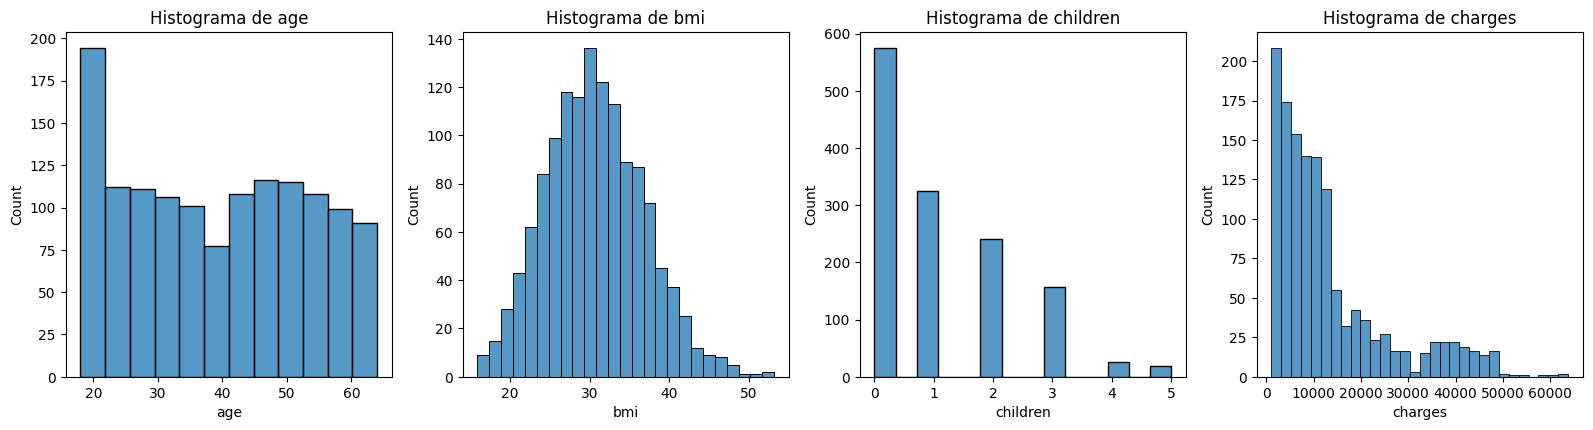

In [351]:
# Paso 1: Obtener columnas numéricas
var = data.select_dtypes(include='number').columns.tolist()

# Paso 2: Definir dimensiones fijas del grid
filas = 2
columnas = 5

# Paso 3: Crear subplots
fig, axes = plt.subplots(filas, columnas, figsize=(20, 8))  # Ajusta tamaño como quieras

axes = axes.flatten()  # Aplanar para acceso fácil

# Paso 4: Graficar cada variable
for i, col in enumerate(var):
    if i < len(axes):  # Para no pasarte del número de axes
        sns.histplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Si sobran subplots, los apagas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Analisis de variables categoricas



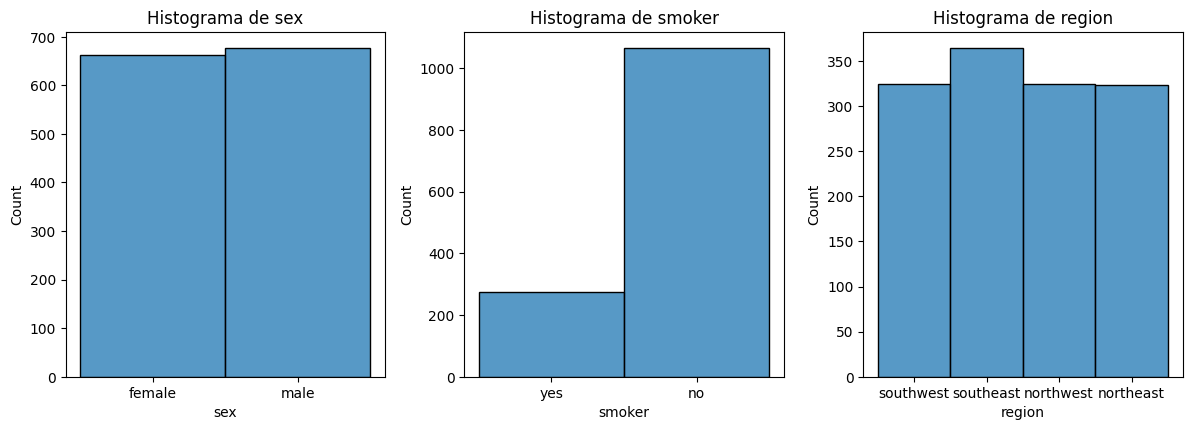

In [352]:

#Analisis de variables categoricas
# Visualización de variables categóricas

# Paso 1: Obtener columnas numéricas
var = data.select_dtypes(include='object').columns.tolist()

# Paso 2: Definir dimensiones fijas del grid
filas = 2
columnas = 5

# Paso 3: Crear subplots
fig, axes = plt.subplots(filas, columnas, figsize=(20, 8))  # Ajusta tamaño como quieras

axes = axes.flatten()  # Aplanar para acceso fácil

# Paso 4: Graficar cada variable
for i, col in enumerate(var):
    if i < len(axes):  # Para no pasarte del número de axes
        sns.histplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Si sobran subplots, los apagas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En la visualizacion de los datos podemos ver que los datos se encuentran bastante balanceados. A exepcion de la variable smoker que en este caso existen mas casos de no fumadores.

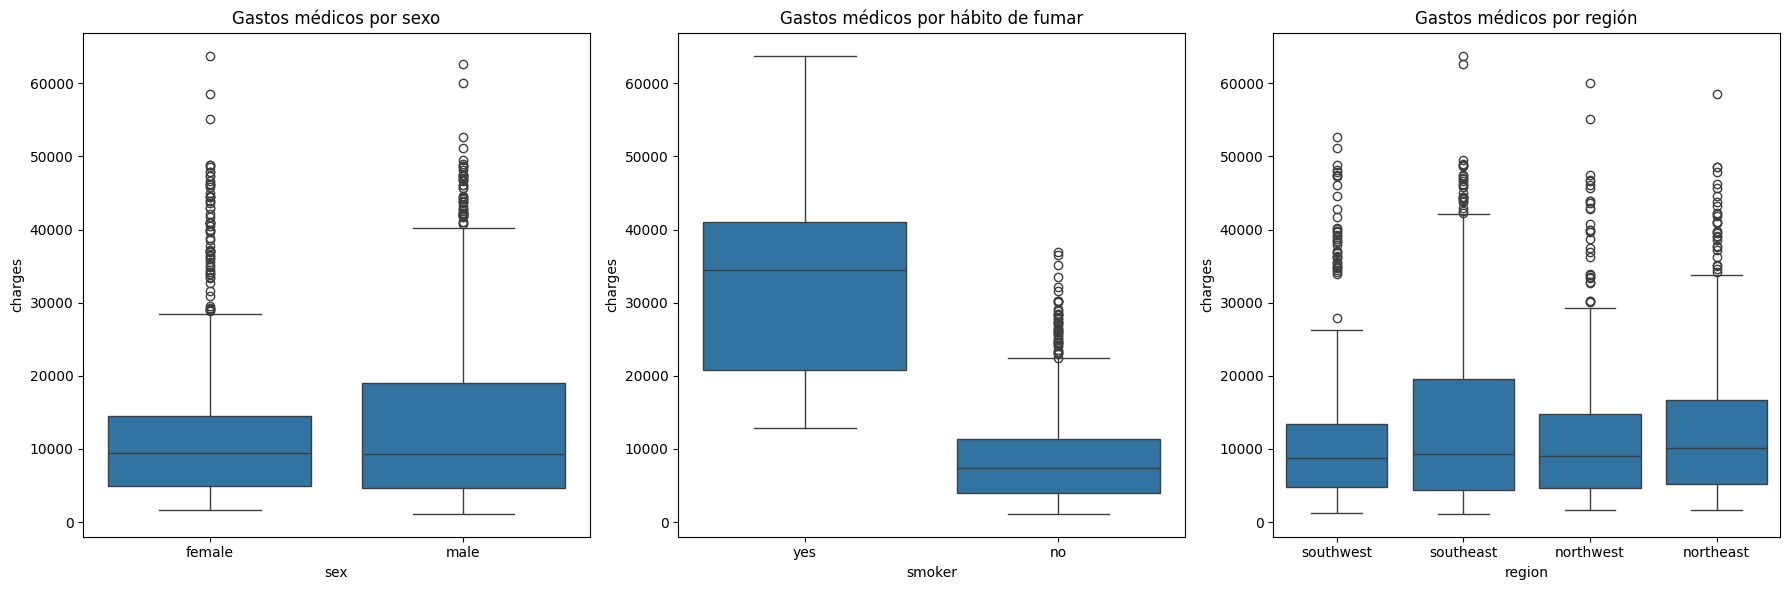

In [353]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(18, 6))  # Una fila, tres columnas

# Sexo vs Charges
sns.boxplot(ax=axis[0], data=data, x="sex", y="charges")
axis[0].set_title("Gastos médicos por sexo")

# Fumador vs Charges
sns.boxplot(ax=axis[1], data=data, x="smoker", y="charges")
axis[1].set_title("Gastos médicos por hábito de fumar")

# Región vs Charges
sns.boxplot(ax=axis[2], data=data, x="region", y="charges")
axis[2].set_title("Gastos médicos por región")

plt.tight_layout()
plt.show()

Podemos ver que existen algunos outliers.

Matriz de correlacion de variables numericas.

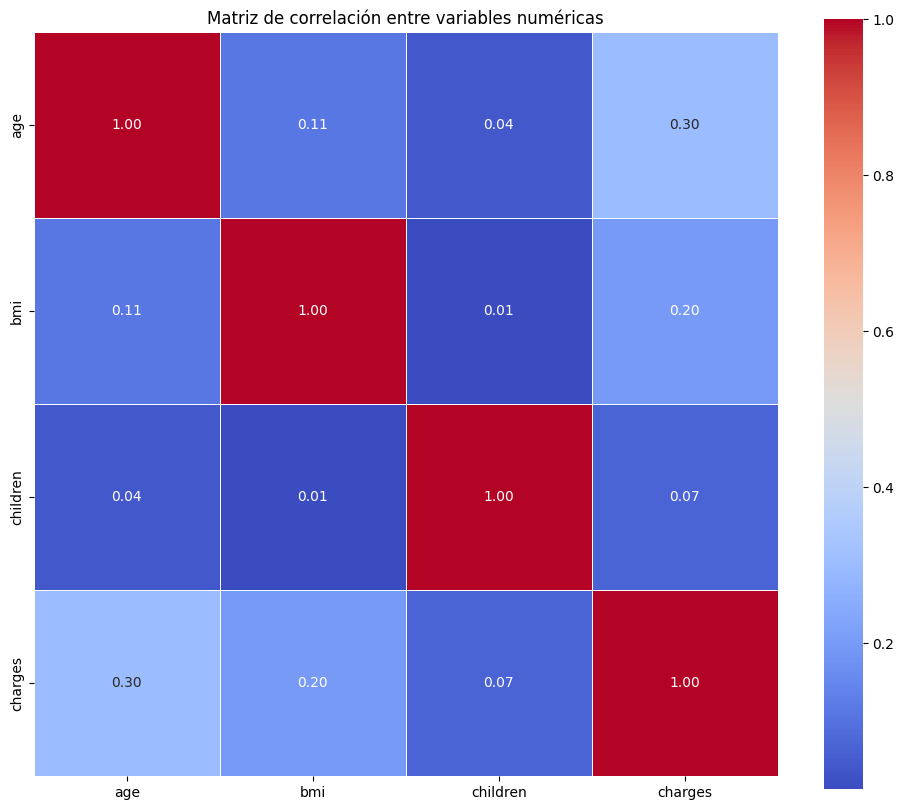

In [354]:
import seaborn as sns
import matplotlib.pyplot as plt

datacore = data.copy()
# Seleccionamos solo las columnas numéricas
num_data = datacore.select_dtypes(include='number')

# Calculamos la matriz de correlación
corr_matrix = num_data.corr()

# Creamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Maztriz de correlacion variables numericas y categoricas.

In [355]:
datacore.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

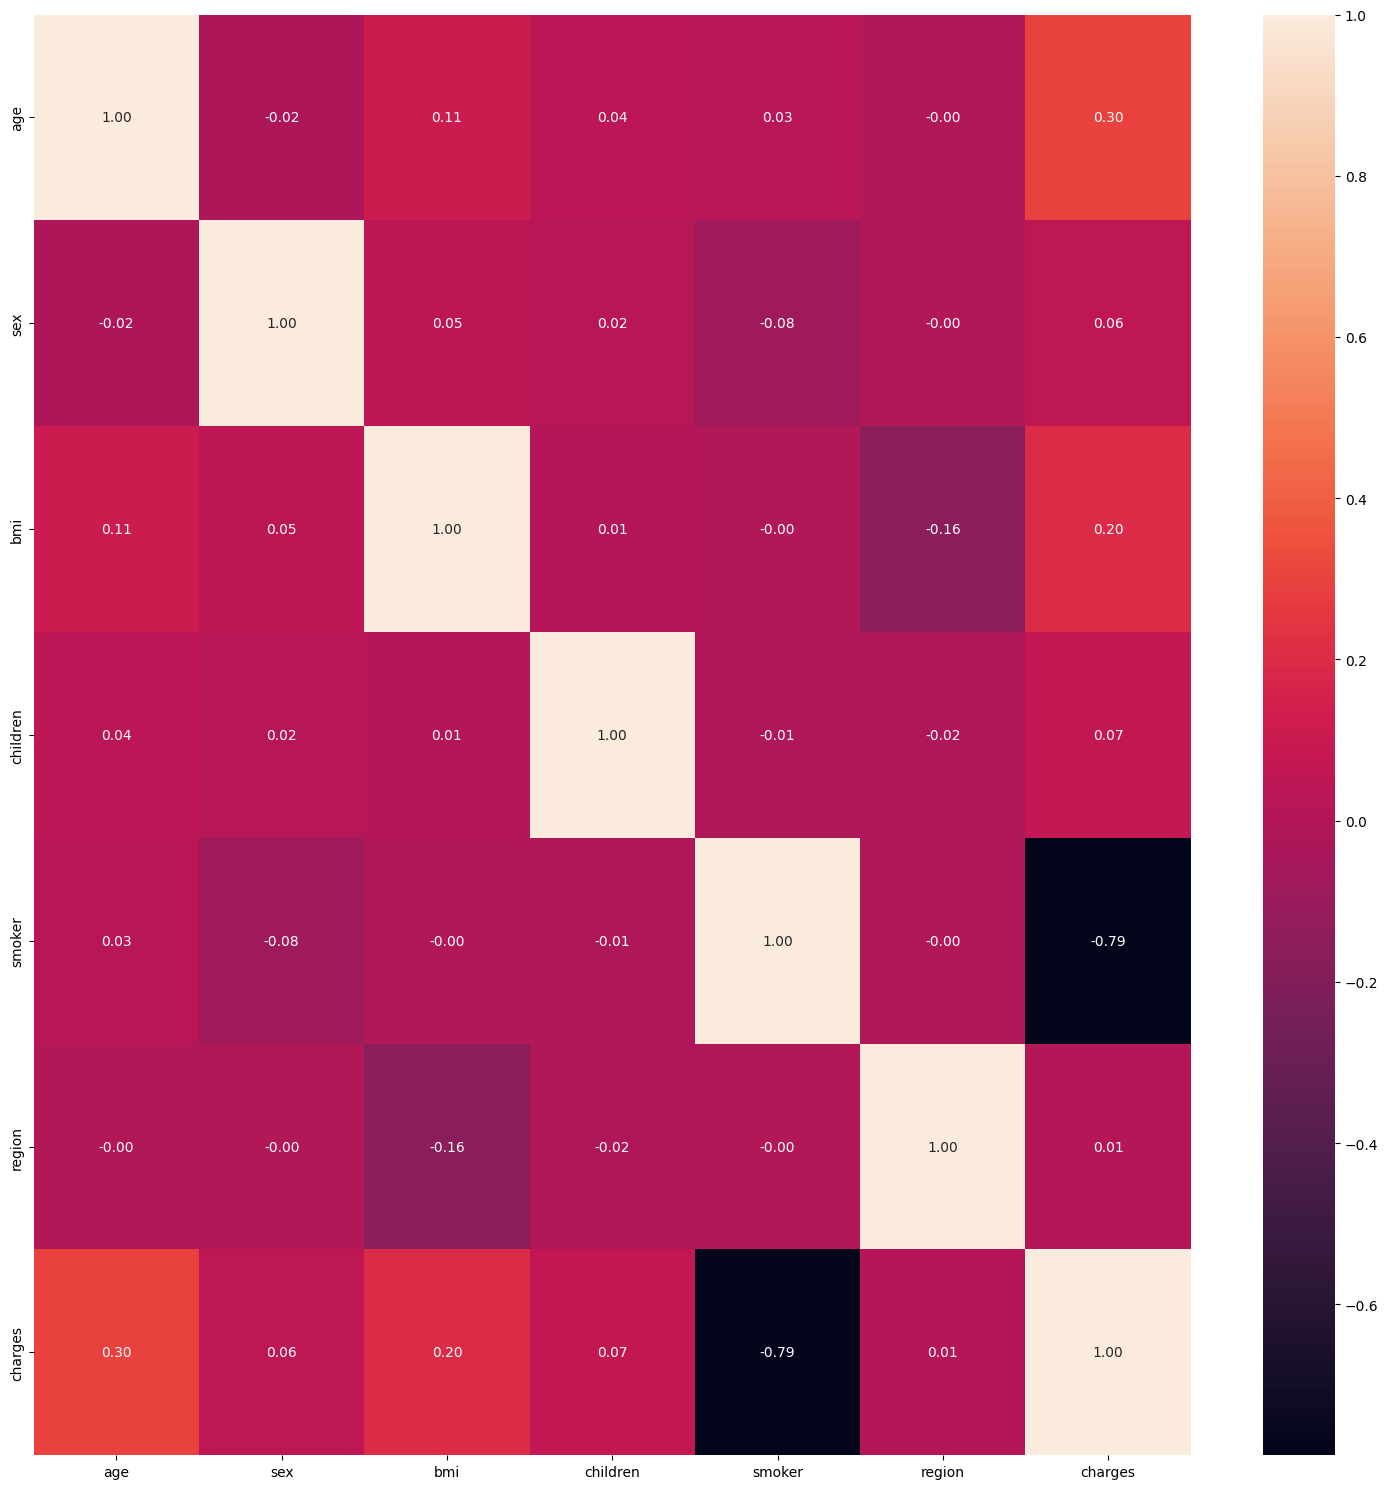

In [356]:
datacore["sex"]  = pd.factorize(datacore["sex"])[0]
datacore["smoker"]  = pd.factorize(datacore["smoker"])[0]
datacore["region"]  = pd.factorize(datacore["region"])[0]


# Ver el resultado

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(datacore[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

smoker -0.79	, Fuerte correlación negativa (¡muy importante!). Esto indica que ser fumador impacta mucho en los gastos, ya que los valores factorizados (como 1 para fumador y 0 para no fumador) están inversamente correlacionados con el gasto.

age 	0.30	, Correlación moderada: a mayor edad, mayor gasto. Esperado en temas de salud.

bmi	    0.20	, Relación positiva débil: el sobrepeso u obesidad podría influir en los costos médicos.


In [357]:
#Eliminamos variables que carecen de inportancia en nuestro analisis
datafinal = data.copy()
# Eliminar columnas solo si existen
columns_to_drop = ["children", "sex","region"]
columns_to_drop = [col for col in columns_to_drop if col in datafinal.columns]  # Filtrar solo las que existen
datafinal= datafinal.drop(columns=columns_to_drop)

print(datafinal.columns)
datafinal

Index(['age', 'bmi', 'smoker', 'charges'], dtype='object')


,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


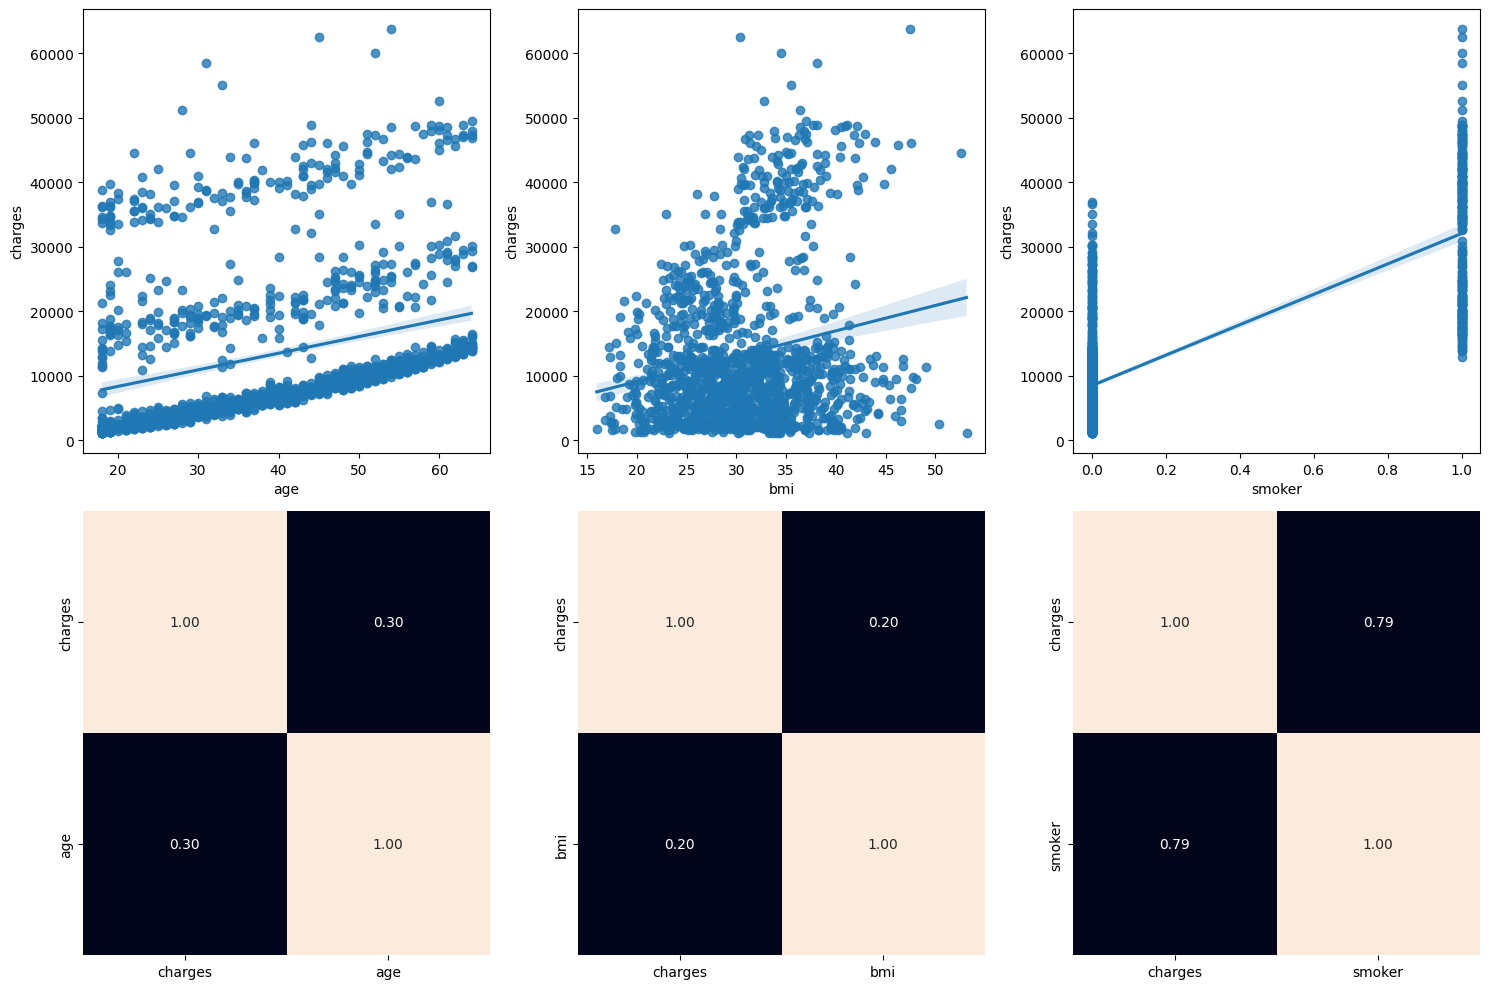

In [358]:

data2 = data.copy()

# Asegúrate de usar el mismo DataFrame
data2["smoker"] = data2["smoker"].map({"yes": 1, "no": 0})  # O ya debería estar hecho

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico 1: age vs charges
sns.regplot(ax=axes[0, 0], data=data2, x="age", y="charges")
sns.heatmap(data2[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axes[1, 0], cbar=False)

# Gráfico 2: bmi vs charges
sns.regplot(ax=axes[0, 1], data=data2, x="bmi", y="charges")
sns.heatmap(data2[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axes[1, 1], cbar=False)

# Gráfico 3: smoker vs charges
sns.regplot(ax=axes[0, 2], data=data2, x="smoker", y="charges")
sns.heatmap(data2[["charges", "smoker"]].corr(), annot=True, fmt=".2f", ax=axes[1, 2], cbar=False)

plt.tight_layout()
plt.show()

Podemos ver que ser fumador impacta mucho en los gastos,

Descripcion de columnas

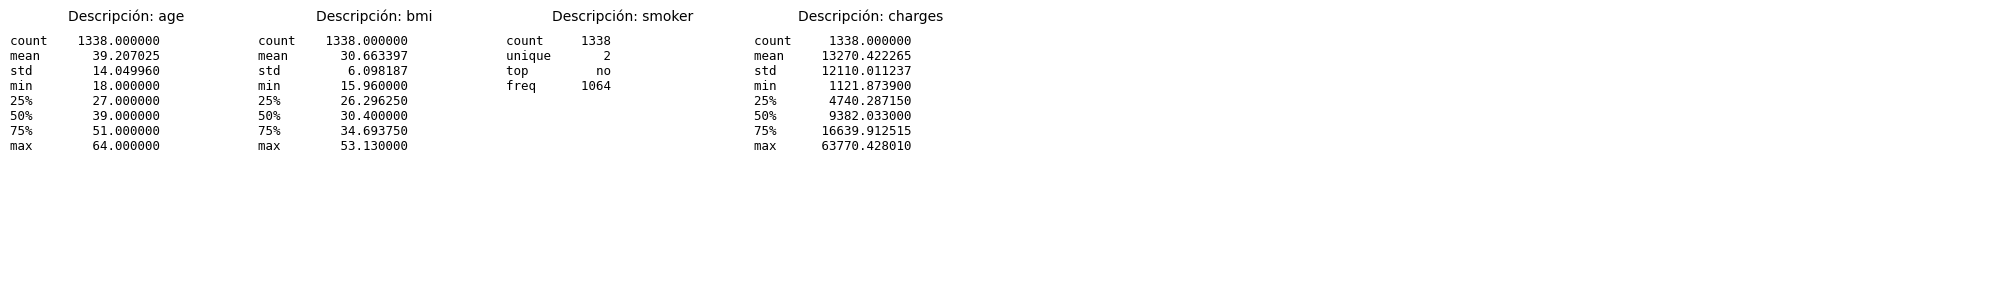

In [359]:
# Paso 1: Columnas
columnas = datafinal.columns
n = len(columnas)

# Aquí guardaremos las descripciones como diccionario
descripciones = {}

# Paso 2: Definir grid
filas = (n + 7) // 8  # 8 columnas por fila
fig, axes = plt.subplots(filas, 8, figsize=(20, 3 * filas))
axes = axes.flatten()

# Paso 3: Guardar descripciones y graficarlas
for i, col in enumerate(columnas):
    descripcion = datafinal[col].describe()
    
    # Guardamos en el diccionario
    descripciones[col] = descripcion
    
    # Convertimos a texto para graficarlo
    texto = descripcion.to_string()

    axes[i].axis('off')
    axes[i].text(0, 1, texto, fontsize=9, va='top', ha='left', family='monospace')
    axes[i].set_title(f"Descripción: {col}", fontsize=10, pad=10)

# Apagamos los subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()

Limpieza de outlers por columnas



In [360]:
# Crear una copia de `datafinal` para limpiarlo sin modificar el original
datafinal_limpio = datafinal.copy()

# Iteramos sobre las columnas en el diccionario de descripciones
for columna in descripciones:
    descripcion = descripciones[columna]

    # Revisamos que existan los cuartiles
    if "75%" in descripcion.index and "25%" in descripcion.index:
        rango_iqr = descripcion["75%"] - descripcion["25%"]
        limite_superior = descripcion["75%"] + 1.5 * rango_iqr
        limite_inferior = descripcion["25%"] - 1.5 * rango_iqr

        # Poner NaN donde haya outliers
        datafinal_limpio.loc[(datafinal_limpio[columna] < limite_inferior) | (datafinal_limpio[columna] > limite_superior), columna] = np.nan
    else:
        print(f"Saltando columna {columna}: es una variable categórica")

# Eliminar las filas con al menos un NaN (outliers)
datafinal_limpio = datafinal_limpio.dropna()
datosdemodelo= datafinal_limpio
datosdemodelo2= datafinal_limpio
# Mostrar el dataset limpio
datafinal_limpio.head()

Saltando columna smoker: es una variable categórica


,age,bmi,smoker,charges
0,19.0,27.900,yes,16884.92400
1,18.0,33.770,no,1725.55230
2,28.0,33.000,no,4449.46200
3,33.0,22.705,no,21984.47061
4,32.0,28.880,no,3866.85520


In [361]:
print(datafinal.shape, " VS ", datafinal_limpio.shape)

(1338, 4)  VS  (1193, 4)


Paso 3: Construir un modelo de regresion lineal 

Primer modelo limpiando outlers

In [362]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Variable objetivo
y = datafinal_limpio["charges"]
# Variables predictoras
X = datafinal_limpio.drop(["charges"], axis=1)

#Convertimos columnas en 0s y 1s
X = pd.get_dummies(X, columns=['smoker'])

# Separar en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [363]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 4728.529915938051
Coeficientes (b1, b2): [  245.57577806    54.58091627 -7724.87896769  7724.87896769]


In [364]:
y_pred = model.predict(X_test)
y_pred

array([ 8629.60477039,  4733.02583576,  3236.06302826,  5293.4568104 ,
        3608.85068636,  9041.53730765, 12621.1206428 , 13227.74918197,
        3871.26985818, 24361.31597205,  4752.67496561, 24219.44393489,
       21152.45658237, 13315.58611202,  5021.68219253,  4065.57792009,
        3273.21639646, 23489.22796552,  4605.26814655, 20063.95524285,
       11880.41477531,  5945.34916493, 10747.9757982 ,  2684.79577396,
        2849.94139081, 10777.99530214,  3567.79996374,  4949.59703792,
        7477.43997314, 12993.59705118,  6928.08305092,  6024.68770782,
       11798.07428203,  4806.04922814, 10144.19134026,  8442.27719218,
        5813.84750186,  4646.74964292, 18803.09324334, 14519.76064888,
        9056.74327393,  4676.84583714, 13734.92541811,  2612.78730963,
        3597.42703908, 12737.76593445,  5982.07624799, 13186.73680449,
       11780.25879396,  3734.34844863, 26716.68321186,  4959.73285257,
       27084.48189722, 20638.38104142, 10199.43758972, 11719.90853635,
      

In [365]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 18171103.807426564
Coeficiente de determinación: 0.6199535729851309


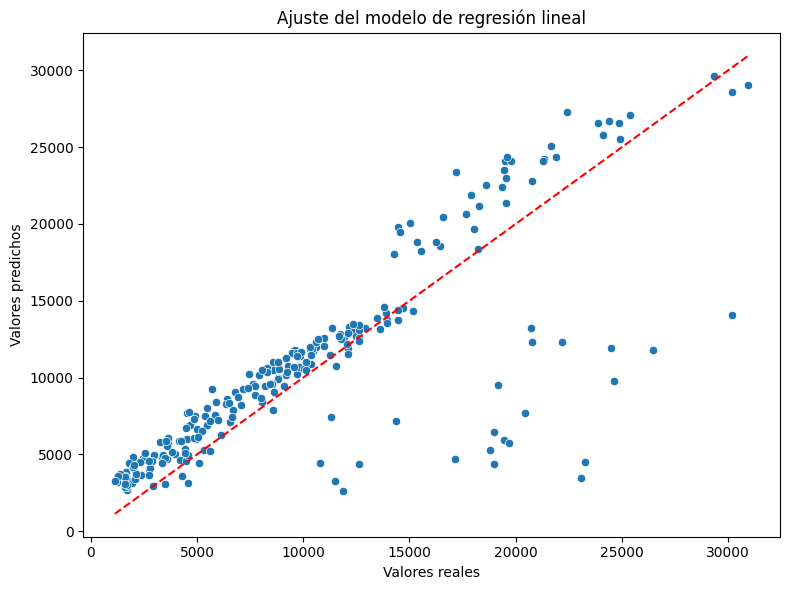

In [366]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Ajuste del modelo de regresión lineal")
plt.tight_layout()
plt.show()

Segundo modelo sin limpiar outlers

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Variable objetivo
y = datafinal["charges"]
# Variables predictoras
X = datafinal.drop(["charges"], axis=1)

#Convertimos columnas en 0s y 1s
X = pd.get_dummies(X, columns=['smoker'])

# Separar en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#Entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [368]:
y_pred = model.predict(X_test)
y_pred

array([ 8.18404147e+03,  7.43100100e+03,  3.73464371e+04,  8.62952830e+03,
        2.73166548e+04,  1.11168596e+04,  5.71018530e+02,  1.72685468e+04,
        1.20000791e+03,  1.03691549e+04,  2.77152613e+04,  8.91412866e+03,
        5.47475597e+03,  3.77256063e+04,  4.08905253e+04,  3.68718212e+04,
        1.49361936e+04,  3.61177211e+04,  9.38199609e+03,  3.18988228e+04,
        2.57961333e+03,  1.00891140e+04,  3.14507861e+03,  6.99357366e+03,
        1.04424884e+04,  1.29687423e+04,  1.53152131e+04,  5.22036025e+03,
        9.16805346e+03,  2.80079135e+03,  8.23359765e+03,  1.34678580e+04,
        5.12313156e+03,  2.58718594e+03,  4.83036995e+03,  1.29600084e+04,
        2.35809809e+03,  9.20769841e+03,  3.33341443e+04,  3.27973851e+04,
        2.55746819e+03,  4.23343695e+03,  1.45060874e+04,  1.19088226e+04,
        8.52333022e+03,  1.25747811e+04,  4.71833327e+03,  2.71019342e+03,
        3.48646232e+04,  8.86633842e+03,  1.64851840e+04,  2.54942467e+03,
        1.21901745e+04,  

In [369]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepto (a): 129.88358874447476
Coeficientes (b1, b2): [   259.41020462    326.45023215 -11837.68592333  11837.68592333]


In [370]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 34512843.880227886
Coeficiente de determinación: 0.7776932310583375


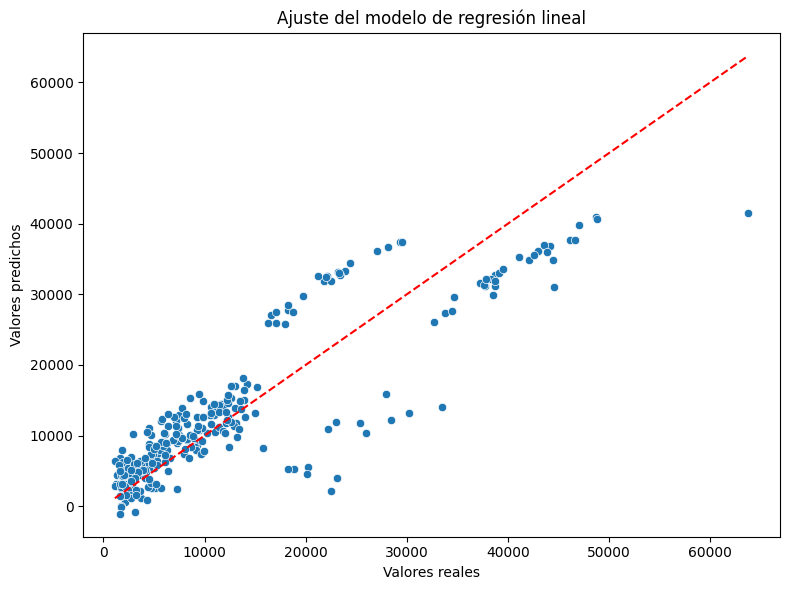

In [371]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Ajuste del modelo de regresión lineal")
plt.tight_layout()
plt.show()

RMSE más bajo con outliers eliminados sugiere que el modelo se ajusta mejor en términos absolutos a los datos limpios (predice más cerca del valor real).

R² más alto con outliers presentes indica que el modelo explica más varianza cuando los outliers están incluidos. Pero esto no necesariamente es bueno: los outliers pueden estar sesgando el modelo y dándole una falsa sensación de “mejor ajuste”.